## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape
#294478 rows

(294478, 5)

c. The number of unique users in the dataset.

In [6]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [7]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [19]:
df.shape[0]-df[(df['group']=='treatment') == (df['landing_page']=='new_page')].shape[0]

3893

f. Do any of the rows have missing values?

In [21]:
df.isnull().sum()
#there is no missing value

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [25]:
df2=df[(df['group']=='treatment') == (df['landing_page']=='new_page')]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [26]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [27]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [29]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [32]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [31]:
df2=df2.drop_duplicates(subset=['user_id'])

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [33]:
df2[df2['converted']== 1].shape[0] / df.shape[0]

0.11801560727796304

b. Given that an individual was in the `control` group, what is the probability they converted?

In [56]:
df2[df2['group']== 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [55]:
df2[df2['group']== 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [40]:
df2.landing_page.value_counts() / len(df2.index)

new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The rate of which one person receive a new page is 50% which mean it wont affect their behaviour of the converted rate just because they see the new page more often**

**Also, the converted rate of the control group is slightly higher than the treatment group (12.04% vs 11.88%) so we can have believe that by probability, the new treatment page doesn't lead to more conversions, however the different is small and further tests need to be conducted to make the appropriate decision**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis $H_{0}$: $p_{new}$** ≤ **$p_{old}$**

**Alternative Hypothesis $H_{1}$: $p_{new}$** > **$p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [42]:
p_new = df2['converted'].sum() / df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [43]:
p_old = df2['converted'].sum() / df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [44]:
# The number of new_page landing
n_new=df2.group.value_counts()[0]
n_new

145310

d. What is $n_{old}$?

In [45]:
#The number of old_page landing
n_old=df2.group.value_counts()[1]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [46]:
new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [47]:
old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [58]:
p_diff = new_page_converted.mean()-old_page_converted.mean()
p_diff

0.0006725588863899512

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [51]:
p_diffs=[]
#use 10000 iteration to simulate
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    p_diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

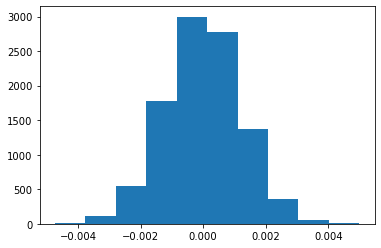

In [53]:
# convert p_diffs to an array
p_diffs=np.array(p_diffs)
# Plot a histogram
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

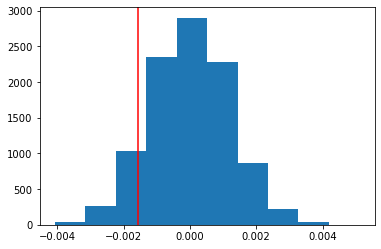

In [62]:
#calculate actual different
actual_diff = df2[df2['group']== 'treatment']['converted'].mean() - df2[df2['group']== 'control']['converted'].mean()
# distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
# plot distribution under the null hypothesis
plt.hist(null_vals);
plt.axvline(x=actual_diff, color='red'); 

In [63]:
(p_diffs > actual_diff).mean()

0.9045

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**What we computed is the p value or the proportion of p_diffs that is larger then our actual diff between 2 conversion rate.  Our p-value is extremely large, at 0.9045 and it exceeds the critical value of 0.05 ( which is the acceptable rate for type 1 error). Therefore we fail to reject the null hypothesis; we cannot assume the new page converts more users than the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [64]:
import statsmodels.api as sm

convert_old = df2.groupby('landing_page')['converted'].sum()[1]
convert_new = df2.groupby('landing_page')['converted'].sum()[0]
n_old = n_old
n_new = n_new

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [69]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
(z_score, p_value)

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Z scores represents the number of standard deviations the value of the statistic. Both z scores and p-values are associated with the standard normal distribution. The p-value calculated this way is similar to what we had in j. and k., meaning that we fail to reject the null hypothesis and the conversion rate of the old page is better than or equal to the new page's one.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We use logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [75]:
# add intercept column
df2['intercept'] = 1 

# create dummy variable column 
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [76]:
# create model 
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

# fit model 
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [82]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2023-05-20 13:41 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

**The p-value found in the logistic regression model(0.19) is different than what we found in parts j and k because our null and alternative hypthesis model assumed that there is an equal probability of the old and new page converting users. 
In detail, our hypothesis in part j and k are:**

$H_{0}$: $p_{new}$** ≤ **$p_{old}$**

$H_{1}$: $p_{new}$** > **$p_{old}$**

**While for losgistic regression, this is a two-tail test and has the form of:**

**$H_{0}$: $b_{i}$** = 0

**$H_{1}$: $b_{i}$** $\neq$ 0

**The null hypothesis states that the slope of the line equals zero, which implies that no relationship exists between the  variables. The alternative hypothesis asserts that the slope does not equal zero, which indicates that there is a relationship between the two variables.**

**In this case, the p value is 0.19 and still higher than the threshhold of 0.05 so we cant reject the null hypothesis, coefficient of ab_page is therefore insignificant, so we cannot say that the new page has any effect on the conversion rate.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**There are lots of other factors that may influence whether or not an individual converts, as mentioned in the lessons, users who have previously visited the old landing page may experience either change aversion or a novelty effect if they are introduced to a new landing page. Adding new factors in the regression model can help improve the accuracy of the prediction, and prove insights on which factors that affect our outcomes.**

**Howerver, it may come with some disadvantage such as:
non-linear relationship, correlated errors, heteroskedasticity, outliers, multicollinearity**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [80]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [85]:
### Create the necessary dummy variables
dum_countries = pd.get_dummies(df_new['country'])
df3 = dum_countries.join(df_new, how='inner')
df3.head()

,CA,UK,US,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,,,,
834778,0,1,0,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,0,0,1,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,0,1,0,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,0,1,0,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,0,1,0,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [89]:
# create model, we can eliminate 1 dummy variables from the model
log_mod2 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'UK', 'CA']])

# fit model 
results2 = log_mod2.fit()

# view results
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2023-05-20 14:00 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
==================================================================

"""

In [88]:
np.exp(results2.params)

intercept    0.136795
ab_page      0.985168
UK           1.009932
CA           0.960062
dtype: float64

**Looking at the p-value of the above variables, none of them are smaller than the threshold of 0.05, so we can conclude that they are not Statistical significant**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [90]:
#create interaction for UK and landing page
UK_newpage = df4['ab_page'] * df4['UK']
df4['UK_newpage'] = UK_newpage
#create interaction for CA and landing page
CA_newpage = df4['ab_page'] * df4['CA']
df4['CA_newpage'] = CA_newpage
df4.head()

,CA,UK,US,country,timestamp,group,landing_page,converted,intercept,ab_page,UK_newpage,CA_newpage
user_id,,,,,,,,,,,,
834778,0,1,0,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0
928468,0,0,1,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,0,1,0,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,0,1,0,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0
710616,0,1,0,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [91]:
### Fit Your Linear Model And Obtain the Results
log_mod3 = sm.Logit(df4['converted'], df4[['intercept', 'UK', 'CA', 'UK_newpage', 'CA_newpage']])
results = log_mod3.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Sat, 20 May 2023   Pseudo R-squ.:               2.417e-05
Time:                        14:02:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2729
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK             0.0045      0.018      0.257      0.797      -0.030       0.039
CA            -0.0073      0.037     -0.196      0.844      -0.080       0.065
UK_newpage     0.0108      0.023      0.475      0.635      -0.034       0.056
CA_newpage    -0.0674      0.052     -1.297      0.195      -0.169       0.034
==============================================================================
"""

**With the observed p-value, we can conclude that adding the interaction terms does not improve the model, all variables are still insignificant. This support the decision to keep the old landing page**

<a id='conclusions'></a>
## Conclusions


In this analysis, we used several methods to test if it better to switch to the new landing pages. 
We have also included the geography factors too see if it affect the preferences of users over the page design based on where they live.

However, all of them support the decision to keep the old page as the probability and hypothesis tests conducted on given dataset pointed out that the conversion rate on the new landing page is not higher than that of the old one. And the variables doesn't have effects on the conversion rate.